In [1]:
import numpy as np
import pandas as pd
from random import randint
from time import time
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def number_of_elements(l):
    count=0
    for i in l:
        count+=1
        
    return count

In [3]:
def sum_of_elements(l):
    summ=0
    for i in l:
        summ+=i
        
    return summ

In [4]:
def bubble_sort(l):
    n = number_of_elements(l)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if l[j]>l[j + 1] :
                l[j], l[j + 1] = l[j + 1], l[j]
    return l

In [5]:
def count(l, value):
    c=0
    for i in l:
        if i==value:
            c+=1
    
    return c

In [6]:
def maximum(l):
    maxx=l[0]
    for i in l:
        if i>maxx:
            maxx=i
            
    return maxx

In [7]:
def minimum(l):
    minn=l[0]
    for i in l:
        if i<minn:
            minn=i
            
    return minn

# Mean

In [8]:
def mean(l):
    return sum_of_elements(l)/number_of_elements(l)
        

In [9]:
lst = []
for i in range(10000):
    lst.append(randint(1,100))

In [10]:
t1=time()
print("Arithmetic Mean using for loop: ", mean(lst))
t2=time()

print('Time taken:', (t2-t1))

Arithmetic Mean using for loop:  50.1558
Time taken: 0.0013842582702636719


In [11]:
t1=time()
print("Arithmetic Mean using numpy: ", np.mean(lst))
t2=time()
print('Time taken:', (t2-t1))

Arithmetic Mean using numpy:  50.1558
Time taken: 0.0019931793212890625


# Median

In [12]:
def median(l):
    l_sorted=bubble_sort(l.copy())
    n=number_of_elements(l)
    
    if n%2==0:
        return (l_sorted[n//2]+l_sorted[n//2-1])/2
        
    else:
        return l_sorted[n//2]

In [13]:
t1=time()
print("Median from scratch: ", median(lst))
t2=time()

print('Time taken:', (t2-t1))

Median from scratch:  50.0
Time taken: 8.428989171981812


In [14]:
t1=time()
print("Median using numpy: ", np.median(lst))
t2=time()
print('Time taken:', (t2-t1))

Median using numpy:  50.0
Time taken: 0.0018470287322998047


# Mode

In [15]:
def mode(l):
    d, modes={}, []
    for i in l:
        d[i]=count(l, i)
        
    maxx=maximum(list(d.values()))
        
    for key in d.keys():
        if maxx==d[key]:
            modes.append(key)
            
    return modes

In [16]:
t1=time()
print("Mode from scratch: ", mode(lst))
t2=time()

print('Time taken:', (t2-t1))

Mode from scratch:  [14]
Time taken: 3.1774845123291016


In [17]:
t1=time()
print("Mode using pandas: ", pd.Series(lst).mode())
t2=time()
print('Time taken:', (t2-t1))

Mode using pandas:  0    14
dtype: int64
Time taken: 0.01616215705871582


In [18]:
t1=time()
print("Mode using scipy.stats.mode: ", stats.mode(lst))
t2=time()
print('Time taken:', (t2-t1))

Mode using scipy.stats.mode:  ModeResult(mode=array([14]), count=array([137]))
Time taken: 0.0019936561584472656


X1 mean: 14.52435528774061 and meadian: 14.367789208452738
X2 mean: 16.46563692774573 and meadian: 18.54011954591181


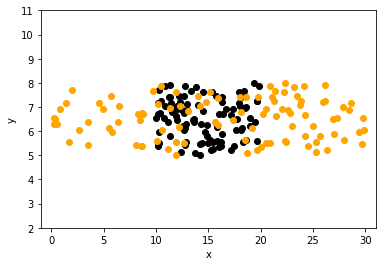

In [19]:
y = np.random.uniform(5,8,100)
x1 = np.random.uniform(10,20,100)
x2 = np.random.uniform(0,30,100)
plt.scatter(x1,y,color="black")
plt.scatter(x2,y,color="orange")
plt.xlim([-1,31])
plt.ylim([2,11])
plt.xlabel("x")
plt.ylabel("y")
print("X1 mean: {} and meadian: {}".format(np.mean(x1),np.median(x1)))
print("X2 mean: {} and meadian: {}".format(np.mean(x2),np.median(x2)))

# Variance and standard deviation

In [20]:
def variance(l):
    avg=mean(l)
    x_diff_avg_2=[]
    for x in l:
        x_diff_avg_2.append((x-avg)**2)
        
    return sum_of_elements(x_diff_avg_2)/number_of_elements(x_diff_avg_2)

In [21]:
t1=time()
print("Variance from scratch: ", variance(lst))
t2=time()

print('Time taken:', (t2-t1))

Variance from scratch:  821.5877263600006
Time taken: 0.003988981246948242


In [22]:
t1=time()
print("Variance using numpy: ", np.var(lst))
t2=time()
print('Time taken:', (t2-t1))

Variance using numpy:  821.5877263599999
Time taken: 0.000997781753540039


In [23]:
def standard_deviation(l):
    return np.sqrt(variance(l))

In [24]:
t1=time()
print("Standard deviation from scratch: ", standard_deviation(lst))
t2=time()

print('Time taken:', (t2-t1))

Standard deviation from scratch:  28.663351624679215
Time taken: 0.00521397590637207


In [25]:
t1=time()
print("Standard deviation using numpy: ", np.std(lst))
t2=time()
print('Time taken:', (t2-t1))

Standard deviation using numpy:  28.663351624679205
Time taken: 0.001999378204345703


In [26]:
def calculate_range(l):
    return maximum(l)-minimum(l)

In [27]:
t1=time()
print("Range from scratch: ", calculate_range(lst))
t2=time()

print('Time taken:', (t2-t1))

Range from scratch:  99
Time taken: 0.0010023117065429688


In [28]:
t1=time()
print("Range using built-in function: ", max(lst)-min(lst))
t2=time()
print('Time taken:', (t2-t1))

Range using built-in function:  99
Time taken: 0.0009963512420654297


# Quartiles

In [29]:
def quartiles(l, Q):
    l_sorted=bubble_sort(l.copy())
    n=number_of_elements(l_sorted)
    
    return l_sorted[int(Q*(n+1))]

In [30]:
t1=time()

Q1, Q2, Q3=quartiles(lst, 0.25), quartiles(lst, 0.5), quartiles(lst, 0.75)

t2=time()

print('Quantile from scratch')
print("0.25-th quantile of the array: ", Q1)
print("0.5-th quantile of the array: ", Q2)
print("0.75-th quantile of the array: ", Q3)
print('Time taken:', (t2-t1))

Quantile from scratch
0.25-th quantile of the array:  26
0.5-th quantile of the array:  50
0.75-th quantile of the array:  75
Time taken: 25.47582769393921


In [31]:
t1=time()

Q1, Q2, Q3=np.quantile(lst,0.25), np.quantile(lst,0.5), np.quantile(lst,0.75)

t2=time()

print('Quantile using numpy')
print("0.25-th quantile of the array: ", Q1)
print("0.5-th quantile of the array: ", Q2)
print("0.75-th quantile of the array: ", Q3)
print('Time taken:', (t2-t1))

Quantile using numpy
0.25-th quantile of the array:  26.0
0.5-th quantile of the array:  50.0
0.75-th quantile of the array:  75.0
Time taken: 0.0029938220977783203
